In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
sys.path.insert(0, '../src/')
from engine import *
from visualization import  *
from nn import *

# Basic tests to show floating point error

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

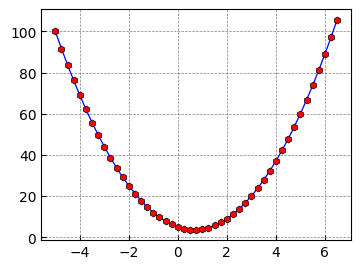

In [3]:
x = np.arange(-5, 6.6, 0.25)
y = f(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

line_plot(ax, x, y)

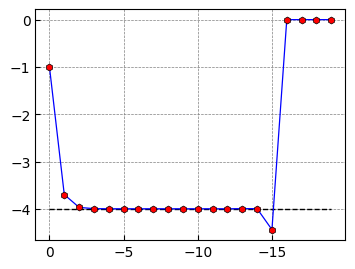

In [4]:
x = 0.0
def der(x, h):
    return (f(x+h) - f(x))/h

h = np.array([10**(-i) for i in range(20)])
y = der(x, h)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
ax.hlines(-4, np.log10(h[0]), np.log10(h[-1]), 'k', linestyles='dashed', linewidth=1.0)
line_plot(ax, np.log10(h), y, marker='h', invertx=True)


# Topological sorting for flow of _backward() function

<!-- ![alt text](neuron_model.jpeg "Model of a neuron") -->
<img src="topo_sort.png" alt="Topological sorting" style="width:700px; border:0.4px solid black;"/>

In [5]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a * b
e.label = 'e'

d = e + c
d.label = 'd'

f = Value(-2.0, label='f')

L = d * f
L.label = 'L'

d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

In [6]:
L.backward()

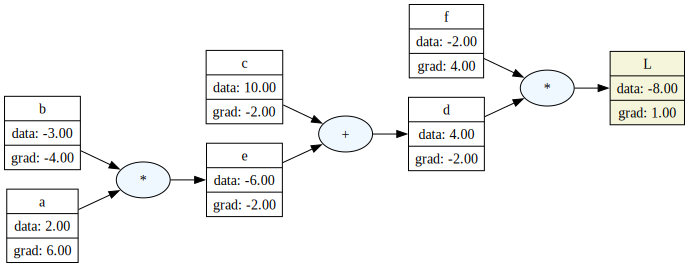

In [7]:
graph = DAG(L)
graph.draw_dot()

# Simple forward step

In [8]:
h = 0.01
a.data += h * a.grad
b.data += h * b.grad 
c.data += h * c.grad 
f.data += h * f.grad 

e = a * b

L = d * f

L.data, a.grad, b.grad, c.grad, f.grad

(-7.84, 6.0, -4.0, -2.0, 4.0)

# Modeling a Neuron 

<!-- ![alt text](neuron_model.jpeg "Model of a neuron") -->
<img src="neuron_model.jpeg" alt="Model of a neuron" style="width:500px; border:0.4px solid black;"/>

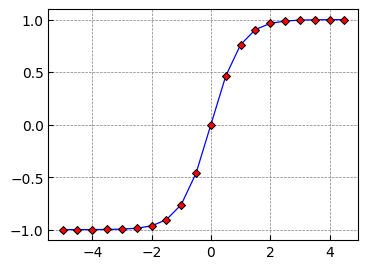

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
x = np.arange(-5., 5., .5)
y = np.tanh(x)

line_plot(ax, x, y, marker='D', markersize=4, markeredgewidth=0.75)

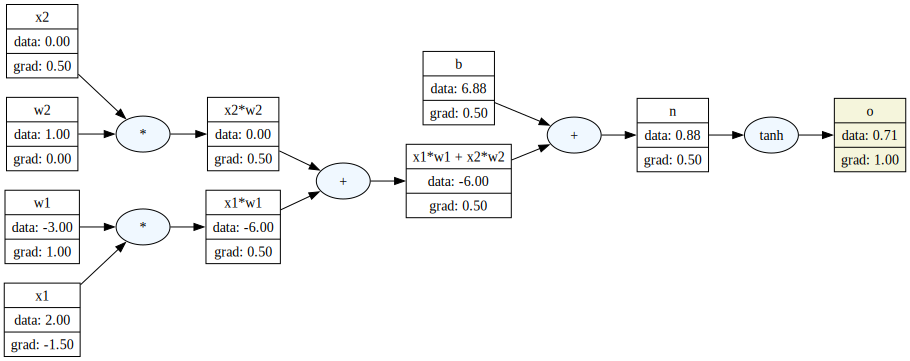

In [10]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137358, label='b')

x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

o.backward()

graph = DAG(o)
graph.draw_dot()

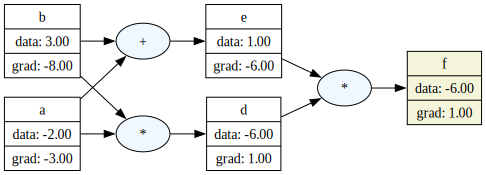

In [11]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a * b; d.label = 'd' 
e = a + b; e.label = 'e'

f = d * e; f.label = 'f'

f.backward()

graph = DAG(f)
graph.draw_dot()

# Reproducing the simple neuron in PyTorch

In [12]:
import torch

In [13]:
x1 = torch.Tensor([2.0]).double()          ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()          ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()         ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()          ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()    ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


# Creating a multilayer perceptron

<img src="mlp.png" alt="mlp" style="width:700px; border:0.4px solid black;"/>

In [14]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.9147204595646912)

# Fitting a neural network for a small dataset

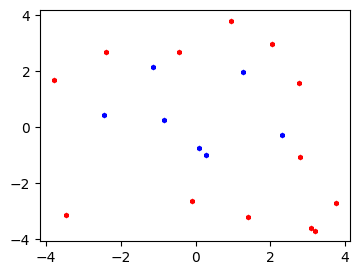

In [37]:
def boundrandom(n):
    return (random.random()*2 - 1)*n
    
xs = [ [boundrandom(4), boundrandom(4)] for _ in range(20) ]

ys = [ -1.0 if xs1**2 + xs2**2 < 2.5**2 else 1.0 for xs1, xs2 in xs]
colors = ['red' if y == 1.0 else 'blue' for y in ys]

    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

for xy, color in zip(xs, ys):
    ax.plot(xy[0],xy[1],color='red' if color==1.0 else 'blue', marker='h', markersize=3)

In [38]:
len(ys), len([y for y in ys if y==-1.0]), len([y for y in ys if y==1.0])

(20, 7, 13)

In [39]:
n = MLP(2, [8, 8, 1])
ypred = [n(x) for x in xs]


[Value(data=-0.8572369348233424), Value(data=0.08335501621898879), Value(data=-0.840095286011707), Value(data=0.6778580224061646), Value(data=0.9902617261032549), Value(data=-0.9594385923677949), Value(data=0.720352964687991), Value(data=0.2492163916468893), Value(data=0.6596272686815723), Value(data=0.38100900200060567), Value(data=-0.8390001631739956), Value(data=-0.22220839581986185), Value(data=0.9815994947291923), Value(data=0.8276645556629443), Value(data=0.9847212871728888), Value(data=0.9424145583260073), Value(data=0.16469777201972352), Value(data=-0.8758657799290002), Value(data=0.9897378324077608), Value(data=-0.45152278520904887)]


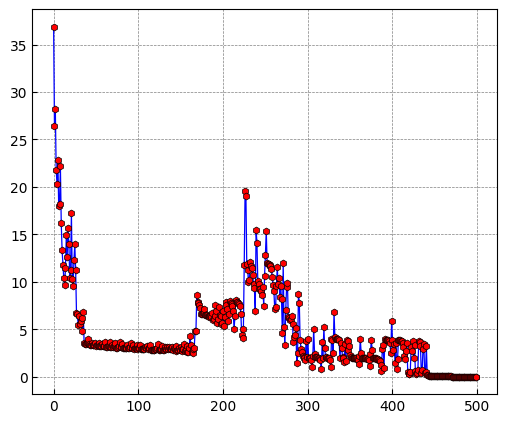

In [40]:

print(ypred)
iteration = []
losses = []
for k in range(500):
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygrd)**2 for ygrd, yout in zip(ys, ypred))

    for p in n.parameters():
        p.grad = 0.0
        
    loss.backward()

    for p in n.parameters():
        p.data += -0.051 * p.grad

    iteration.append(k)
    losses.append(loss.data)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

line_plot(ax, iteration, losses,)

In [41]:
ypred, ys

([Value(data=0.9998539818080205),
  Value(data=-0.9879895385389724),
  Value(data=0.9999135625163793),
  Value(data=0.9745807357112036),
  Value(data=0.9177422614318991),
  Value(data=0.988913962580535),
  Value(data=-0.9999685939789887),
  Value(data=0.9976518078324234),
  Value(data=-0.984826312102576),
  Value(data=0.9825804328285511),
  Value(data=0.9999140664756339),
  Value(data=-0.9988446901971703),
  Value(data=0.95658896390151),
  Value(data=-0.981282731592797),
  Value(data=0.9712422008872239),
  Value(data=0.9716468477346116),
  Value(data=-0.9999699344302234),
  Value(data=0.9918062459186467),
  Value(data=-0.9025767226369844),
  Value(data=0.9999069472180611)],
 [1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0])